# Multiple Linear Regression

#### Problem Statement

A US bike-sharing provider `BoomBikes` has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes ?
- How well those variables describe the bike demands ?



# Using Required Libraries 

In [231]:
#importing the required libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from pandas.plotting import lag_plot

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# Understanding Data

In [232]:
# loading the data from csv file into data frame
bikeshare_df = pd.read_csv(r'C:\day.csv')

##### Printing the first 5 rows of the dataframe

In [233]:
bikeshare_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


###### Data Dictionary 

- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not.
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered


In [234]:
# Show all the columns in a data frame 
pd.set_option('display.max_columns', None)

In [235]:
# Get the number of rows and columns in a data frame using shape method
bikeshare_df.shape

(730, 16)

Total number of Rows: 730 <br>
Total number of columns: 16

In [236]:
# Dataframe details using the info method

bikeshare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [237]:
# List of columns in the datafram 

bikeshare_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [238]:
# Describe the data frame using describe method 

bikeshare_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [239]:
#checking for null values
bikeshare_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [240]:
#checking for duplicates
bikeshare_df.duplicated().value_counts()  

False    730
Name: count, dtype: int64

##### Records are unique

## Data Preprocessing(Dropping Unnecessary Variables)

  **Variable Removal:**

  The following variables needs to be dropped for the below reasons:
  
  1. 'casual' and 'registered': These two variables also needs to be dropped since their sum ('cnt') provides the total count of bike rentals, which is the target variable.
  
  2. 'instant': This variable represents the serial number of each record, which is not relevant for the analysis.
  
  3. 'dteday': This variable is redundant because the required data for analysis is present in 'mnth' and 'yr'.

In [241]:
# dropping columns as per the above analysis 

bikeshare_df.drop(columns=['casual','registered','instant','dteday'],axis=1,inplace=True)
bikeshare_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Data Preprocessing (Categorization of Columns) 

  - season: Categorized into four values, namely Spring, Summer, Fall, and Winter.
  - mnth: Categorized into months from January to December.  
  - weathersit: Categorized into four values, including Clear, Mist, Light Snow, and Heavy Rain.
  - weekday: Categorized into days of the week, including Sunday (Sun), Monday (Mon), Tuesday (Tue), Wednesday (Wed), Thursday (Thu), Friday (Fri), and Saturday (Sat).

In [242]:
# Categorization of variable based on input from data dictionary 

bikeshare_df['weathersit'] = bikeshare_df.weathersit.map({1:'Clear', 2:'Mist', 3:'Light Snow', 4:'Heavy Rain'})
bikeshare_df['season'] = bikeshare_df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bikeshare_df['mnth']=bikeshare_df.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bikeshare_df['weekday']=bikeshare_df.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
bikeshare_df.head() # Printing the data data after appying change 


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Data Visualization & EDA

##### Visualizing Continous variables 

Create array of categorical and continuous variable

In [243]:

list_of_categorical_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
list_of_continuous_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

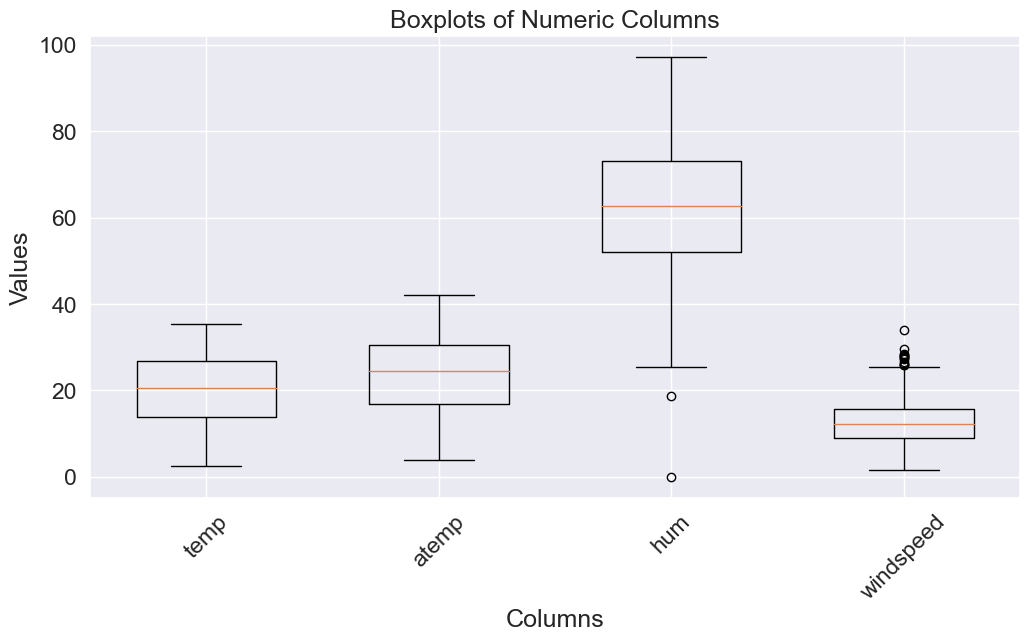

In [244]:
# Set up the plot for continuous variable (excluding cnt) using box plot
columns_to_plot = ['temp', 'atemp', 'hum', 'windspeed'] # Not including cnt

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Loop through the columns and create boxplots
for i, column in enumerate(columns_to_plot):
    ax.boxplot(bikeshare_df[column], positions=[i], widths=0.6)

# Customize the plot
ax.set_xticklabels(columns_to_plot, rotation=45)
ax.set_xlabel('Columns')
ax.set_ylabel('Values')
ax.set_title('Boxplots of Numeric Columns')

# Add a grid for better readability
ax.yaxis.grid(True)


Ploting the target variable for outliers 

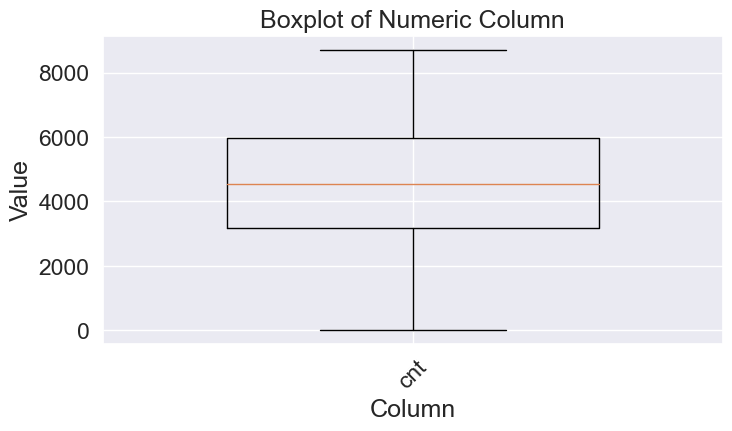

In [245]:
# Set up the plot for continuous variable cnt
column_to_plot = ['cnt'] # Not 

# Set up the plot
fig, ax = plt.subplots(figsize=(8, 4))

# Loop through the columns and create boxplots
for i, column in enumerate(column_to_plot):
    ax.boxplot(bikeshare_df[column], positions=[i], widths=0.6)

# Customize the plot
ax.set_xticklabels(column_to_plot, rotation=45)
ax.set_xlabel('Column')
ax.set_ylabel('Value')
ax.set_title('Boxplot of Numeric Column')

# Add a grid for better readability
ax.yaxis.grid(True)


There is no presence of outliers in count variable 

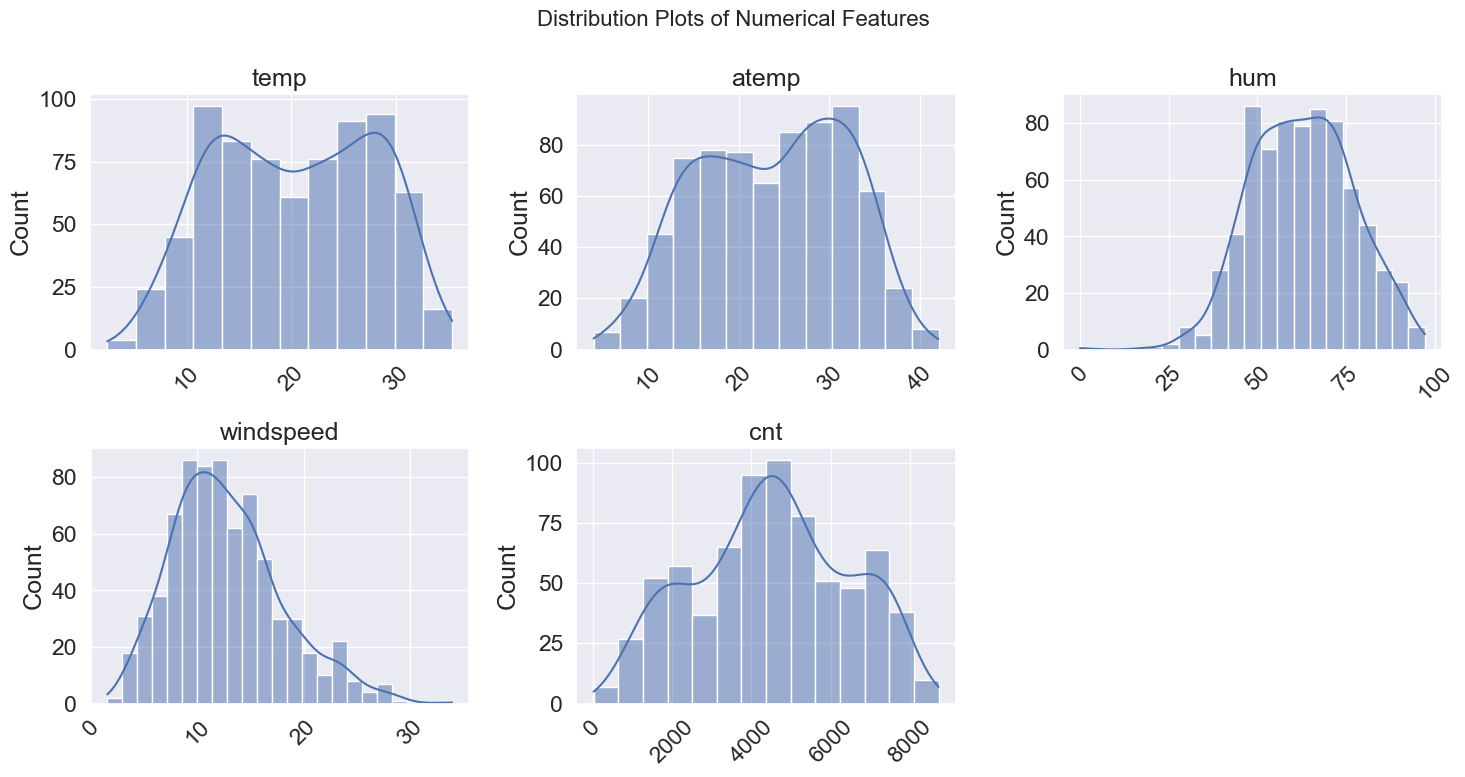

In [246]:
# Select numerical columns for plotting
numerical_columns = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Calculate number of rows and columns for subplots
n_cols = 3  # You can adjust this to change the number of columns in the subplot grid
n_rows = (len(numerical_columns) - 1) // n_cols + 1

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
fig.suptitle('Distribution Plots of Numerical Features', fontsize=16)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create distplots
for i, column in enumerate(numerical_columns):
    sns.histplot(data=bikeshare_df, x=column, kde=True, ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

<Figure size 2400x1600 with 0 Axes>

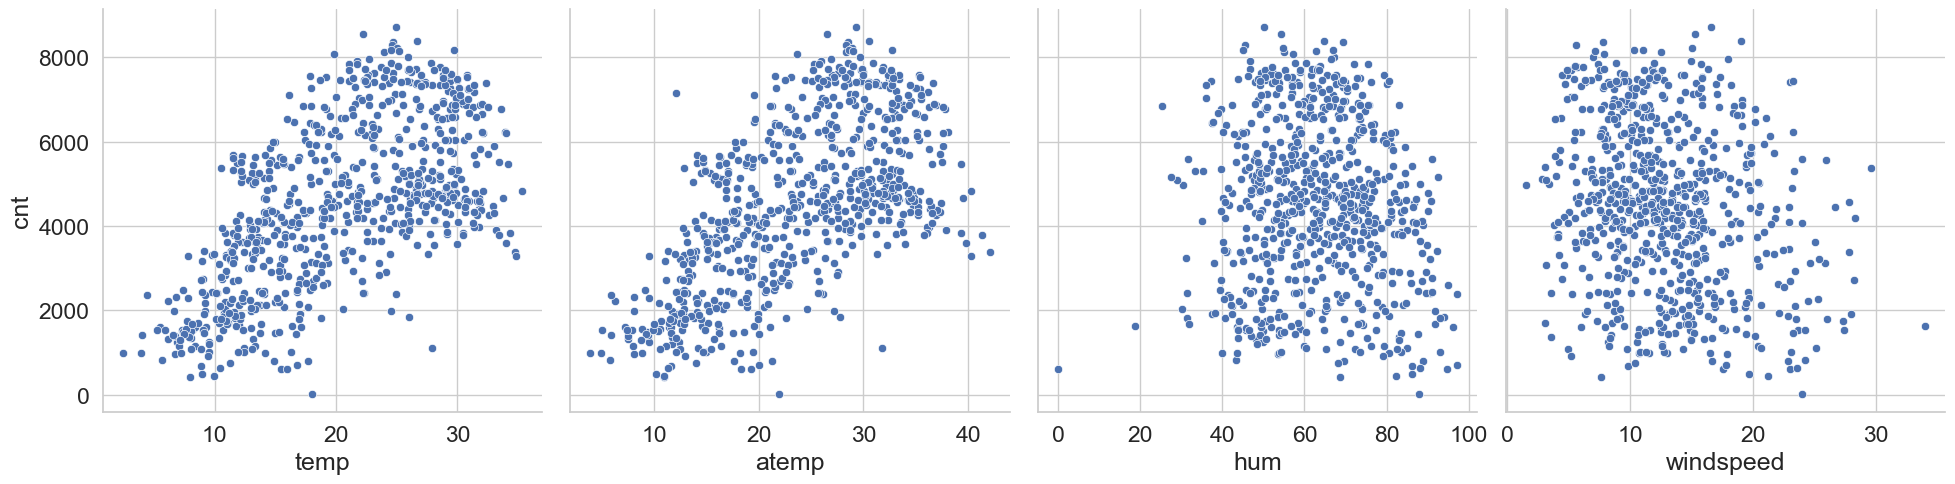

In [247]:
plt.figure(figsize=(24, 16))

# Set the font scale to increase the font size
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
sns.pairplot(data=bikeshare_df,x_vars=['temp','atemp','hum','windspeed'],y_vars='cnt',kind='scatter',height=5,aspect=1);
plt.show()


  **Observations:**

  1. The count of bike rentals per day appears to increase with higher temperatures, both for the actual temperature (`temp`) and the adjusted temperature (`atemp`).

  2. `Temp` and `atemp` exhibit similar trends, suggesting a strong correlation between the two variables.

  3. Based on the boxplot graphs we see outliers for humidity and windspeed variables. 

In [248]:
# Defining a function to remove outliers 

def remove_outliers(data, column=None, threshold=1.5):
    """
    Remove outliers from a dataset using the Interquartile Range (IQR) method.
    
    Parameters:
    data (list or numpy array or pandas DataFrame): The dataset to remove outliers from.
    column (str, optional): If data is a DataFrame, specify the column name to process.
    threshold (float, optional): The IQR multiplier to use for determining outliers. Default is 1.5.
    
    Returns:
    numpy array or pandas DataFrame: The dataset with outliers removed.
    """
    
    if isinstance(data, list):
        data = np.array(data)
    
    if column is not None:
        if not isinstance(data, pd.DataFrame):
            raise ValueError("Column specified but data is not a DataFrame")
        series = data[column]
    else:
        series = data
    
    q1 = np.percentile(series, 25)
    q3 = np.percentile(series, 75)
    iqr = q3 - q1
    lower_bound = q1 - (threshold * iqr)
    upper_bound = q3 + (threshold * iqr)
    
    if column is not None:
        return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    else:
        return data[(data >= lower_bound) & (data <= upper_bound)]

In [249]:
# Variables marked for outliers 'hum', 'windspeed'

bikeshare_df = remove_outliers(bikeshare_df, column='hum')
bikeshare_df = remove_outliers(bikeshare_df, column='windspeed')


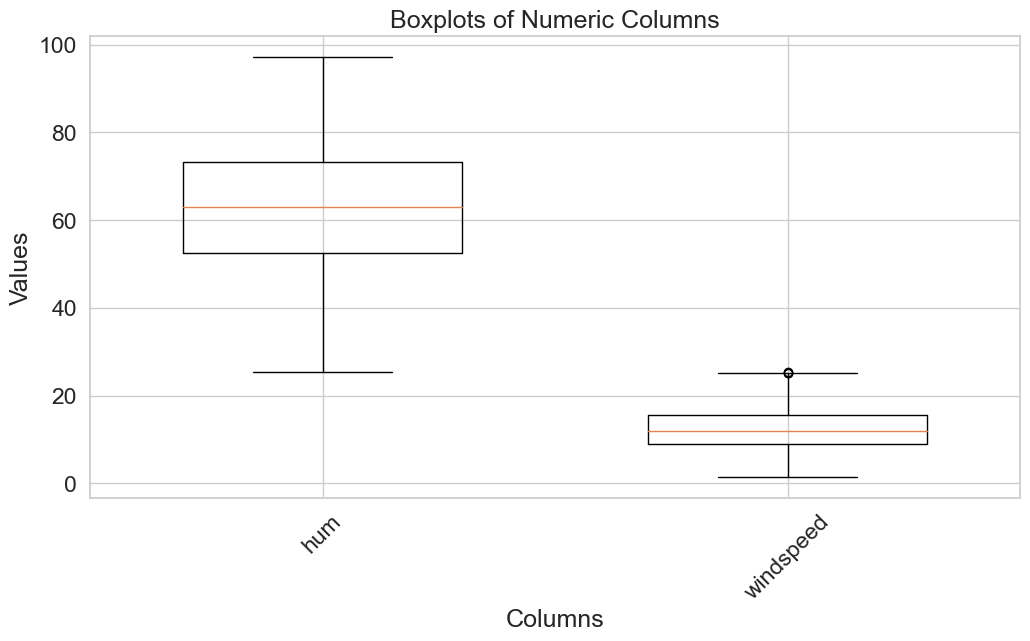

In [250]:
# Verify the presence of outliers for humidity and windspeed column 

columns_to_plot = ['hum', 'windspeed'] # Not including cnt

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Loop through the columns and create boxplots
for i, column in enumerate(columns_to_plot):
    ax.boxplot(bikeshare_df[column], positions=[i], widths=0.6)

# Customize the plot
ax.set_xticklabels(columns_to_plot, rotation=45)
ax.set_xlabel('Columns')
ax.set_ylabel('Values')
ax.set_title('Boxplots of Numeric Columns')

# Add a grid for better readability
ax.yaxis.grid(True)

There is no outliers present in humidity and windspeed variable 

##### Visualizing Categorical Variable

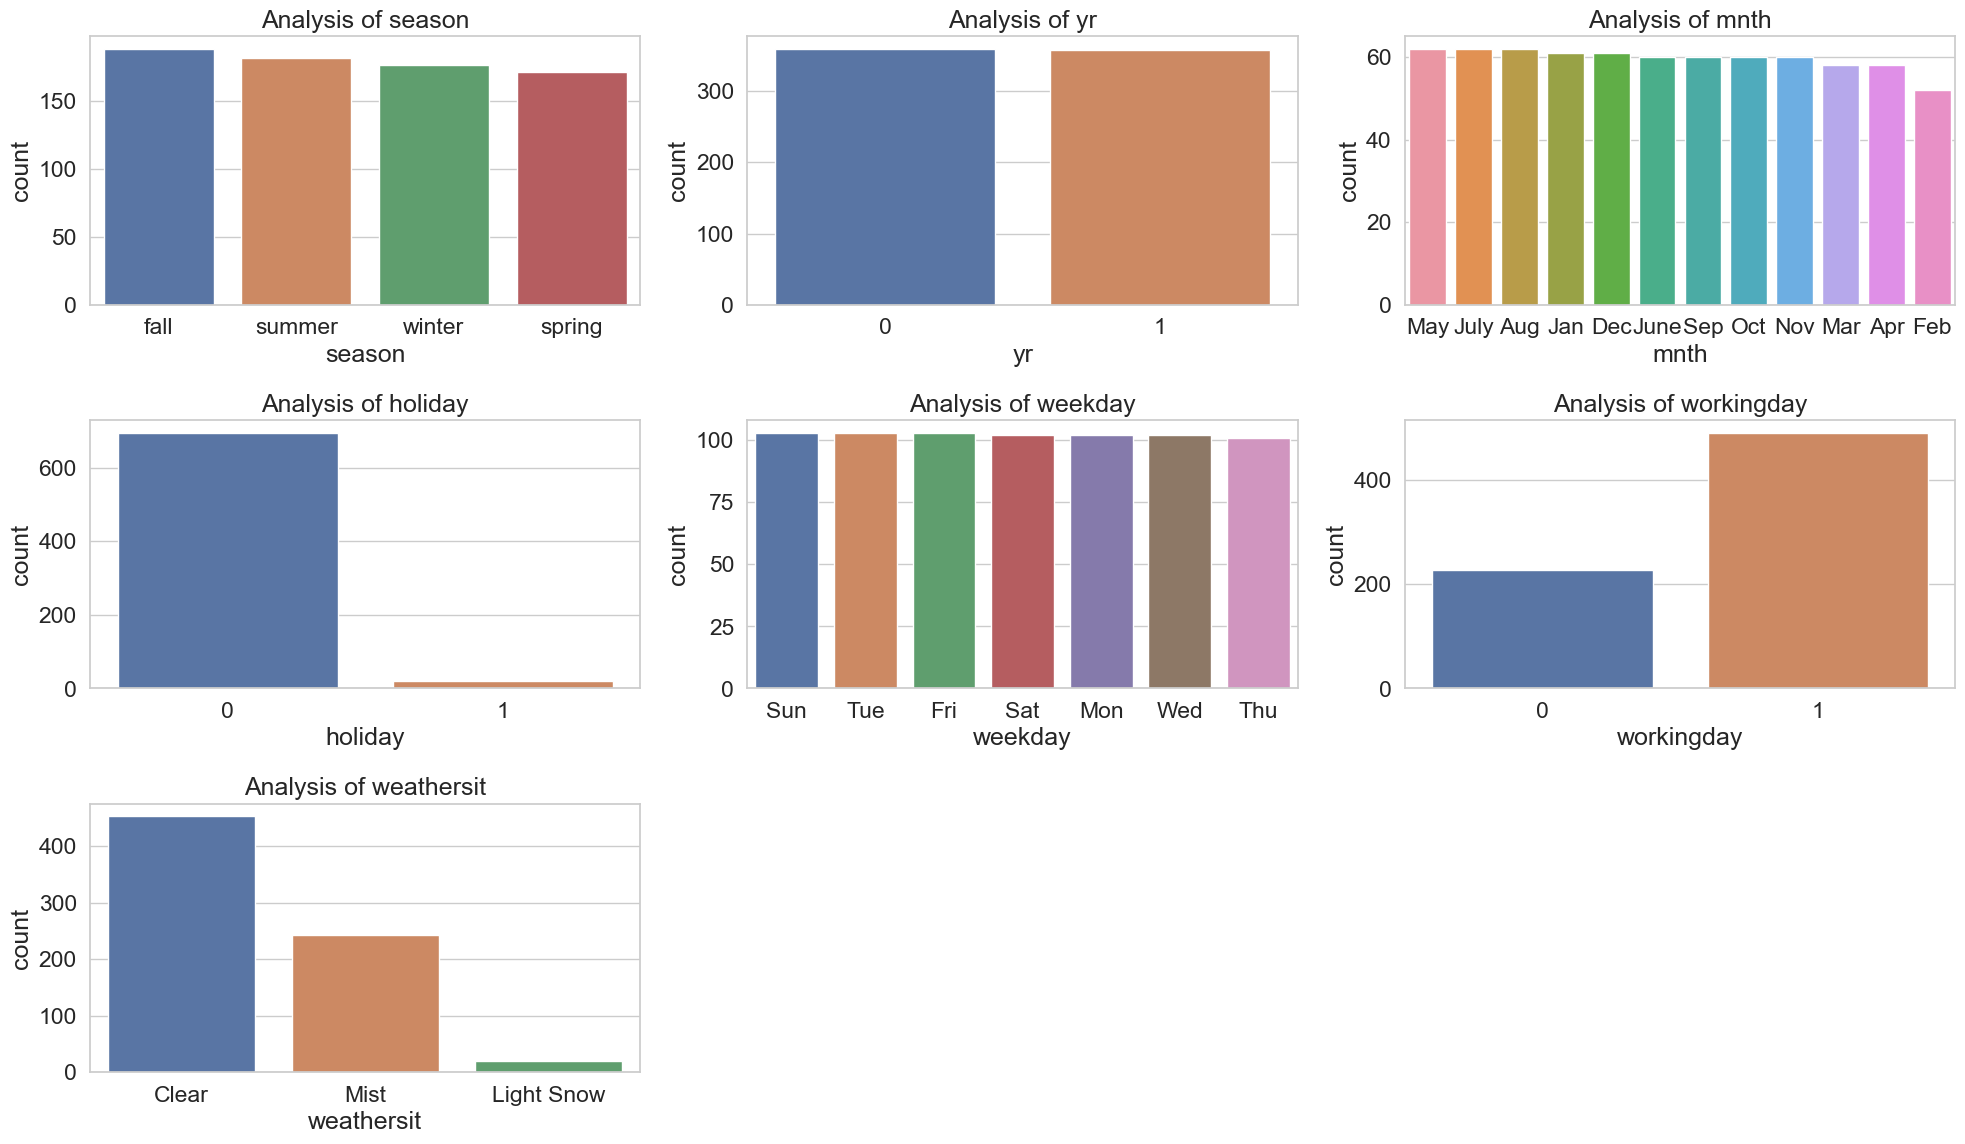

In [251]:
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# Set up the plot
plt.figure(figsize=(20, 15))

# Loop through each column and create a subplot
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 3, i)    
    value_counts = bikeshare_df[column].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.xlabel(column)
    plt.ylabel('count')
    plt.title(f'Analysis of {column}')

plt.tight_layout()
plt.show()

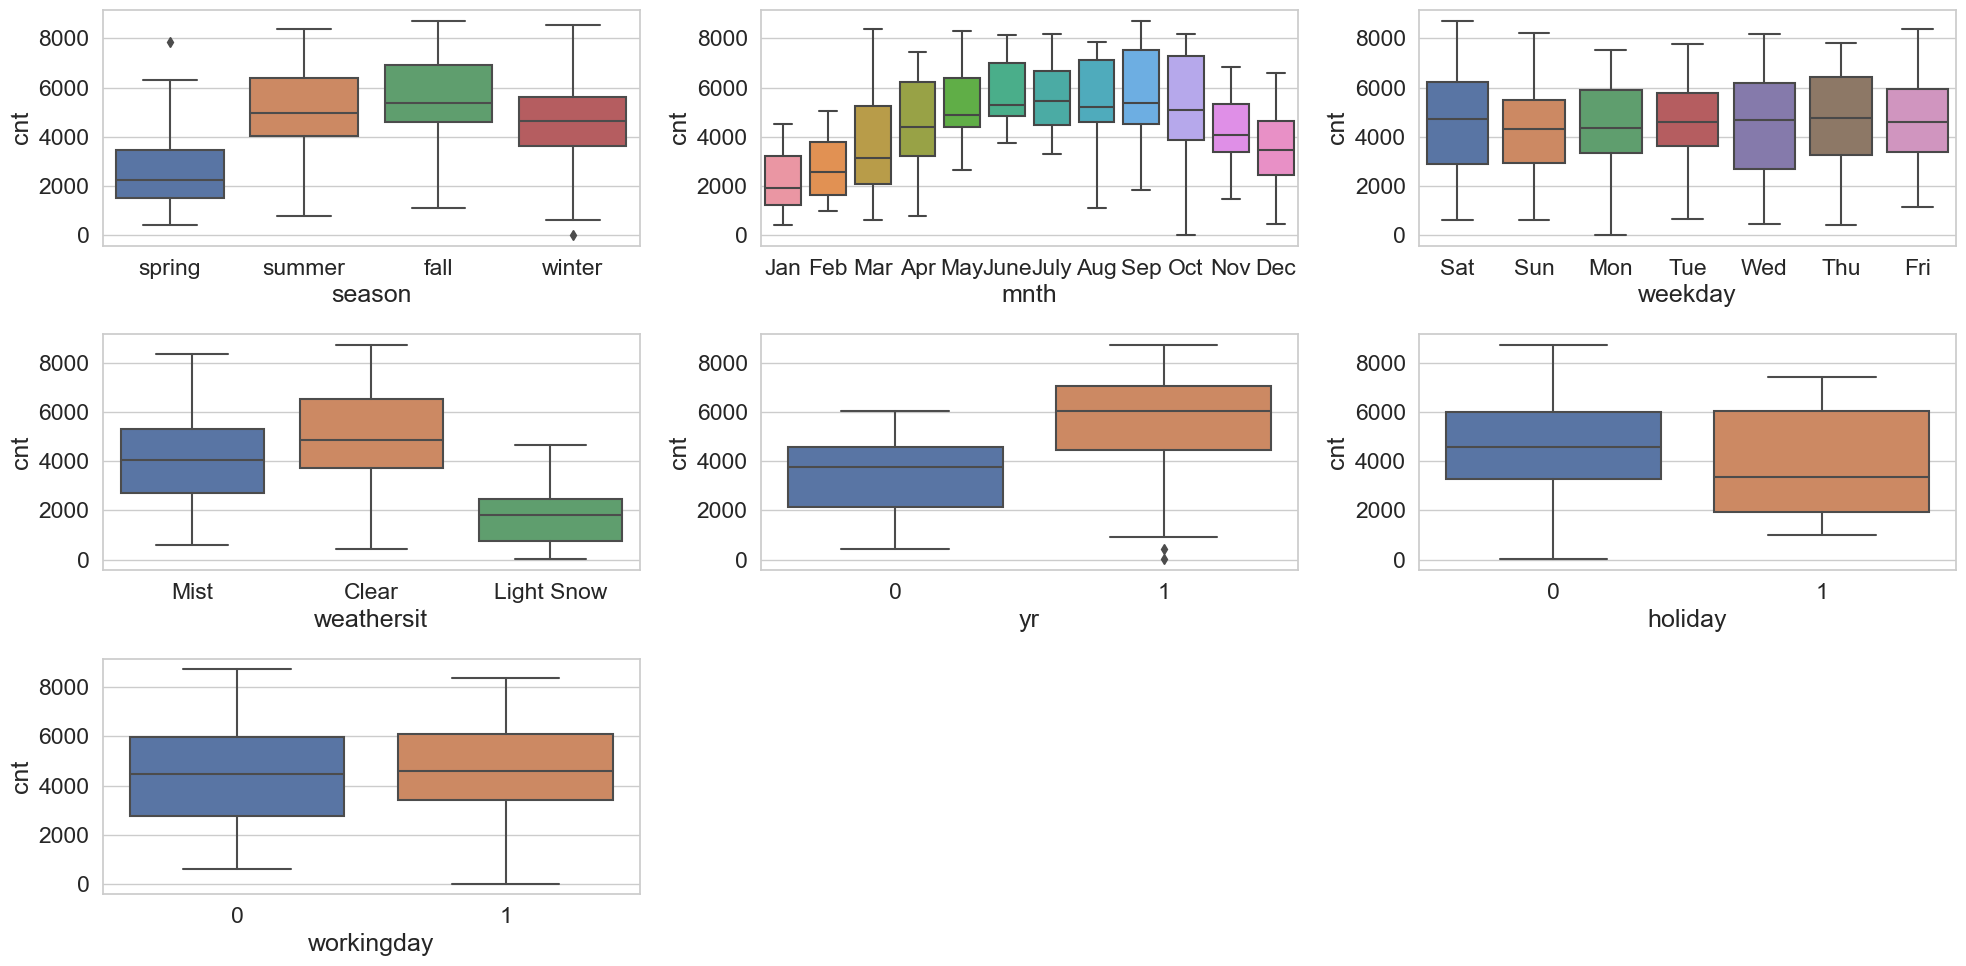

In [252]:
# Create a figure with 2 rows and 4 columns of subplots
plt.figure(figsize=(20, 10))

# Subplot 1: Season
plt.subplot(3, 3, 1)
sns.boxplot(x='season', y='cnt', data=bikeshare_df)

# Subplot 2: Month
plt.subplot(3, 3, 2)
sns.boxplot(x='mnth', y='cnt', data=bikeshare_df)

# Subplot 3: Weekday
plt.subplot(3, 3, 3)
sns.boxplot(x='weekday', y='cnt', data=bikeshare_df)

# Subplot 4: Weather Situation
plt.subplot(3, 3, 4)
sns.boxplot(x='weathersit', y='cnt', data=bikeshare_df)

# Subplot 5: Year
plt.subplot(3, 3, 5)
sns.boxplot(x='yr', y='cnt', data=bikeshare_df)

# Subplot 6: Holiday
plt.subplot(3, 3, 6)
sns.boxplot(x='holiday', y='cnt', data=bikeshare_df)

# Subplot 7: Working Day
plt.subplot(3, 3, 7)
sns.boxplot(x='workingday', y='cnt', data=bikeshare_df)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

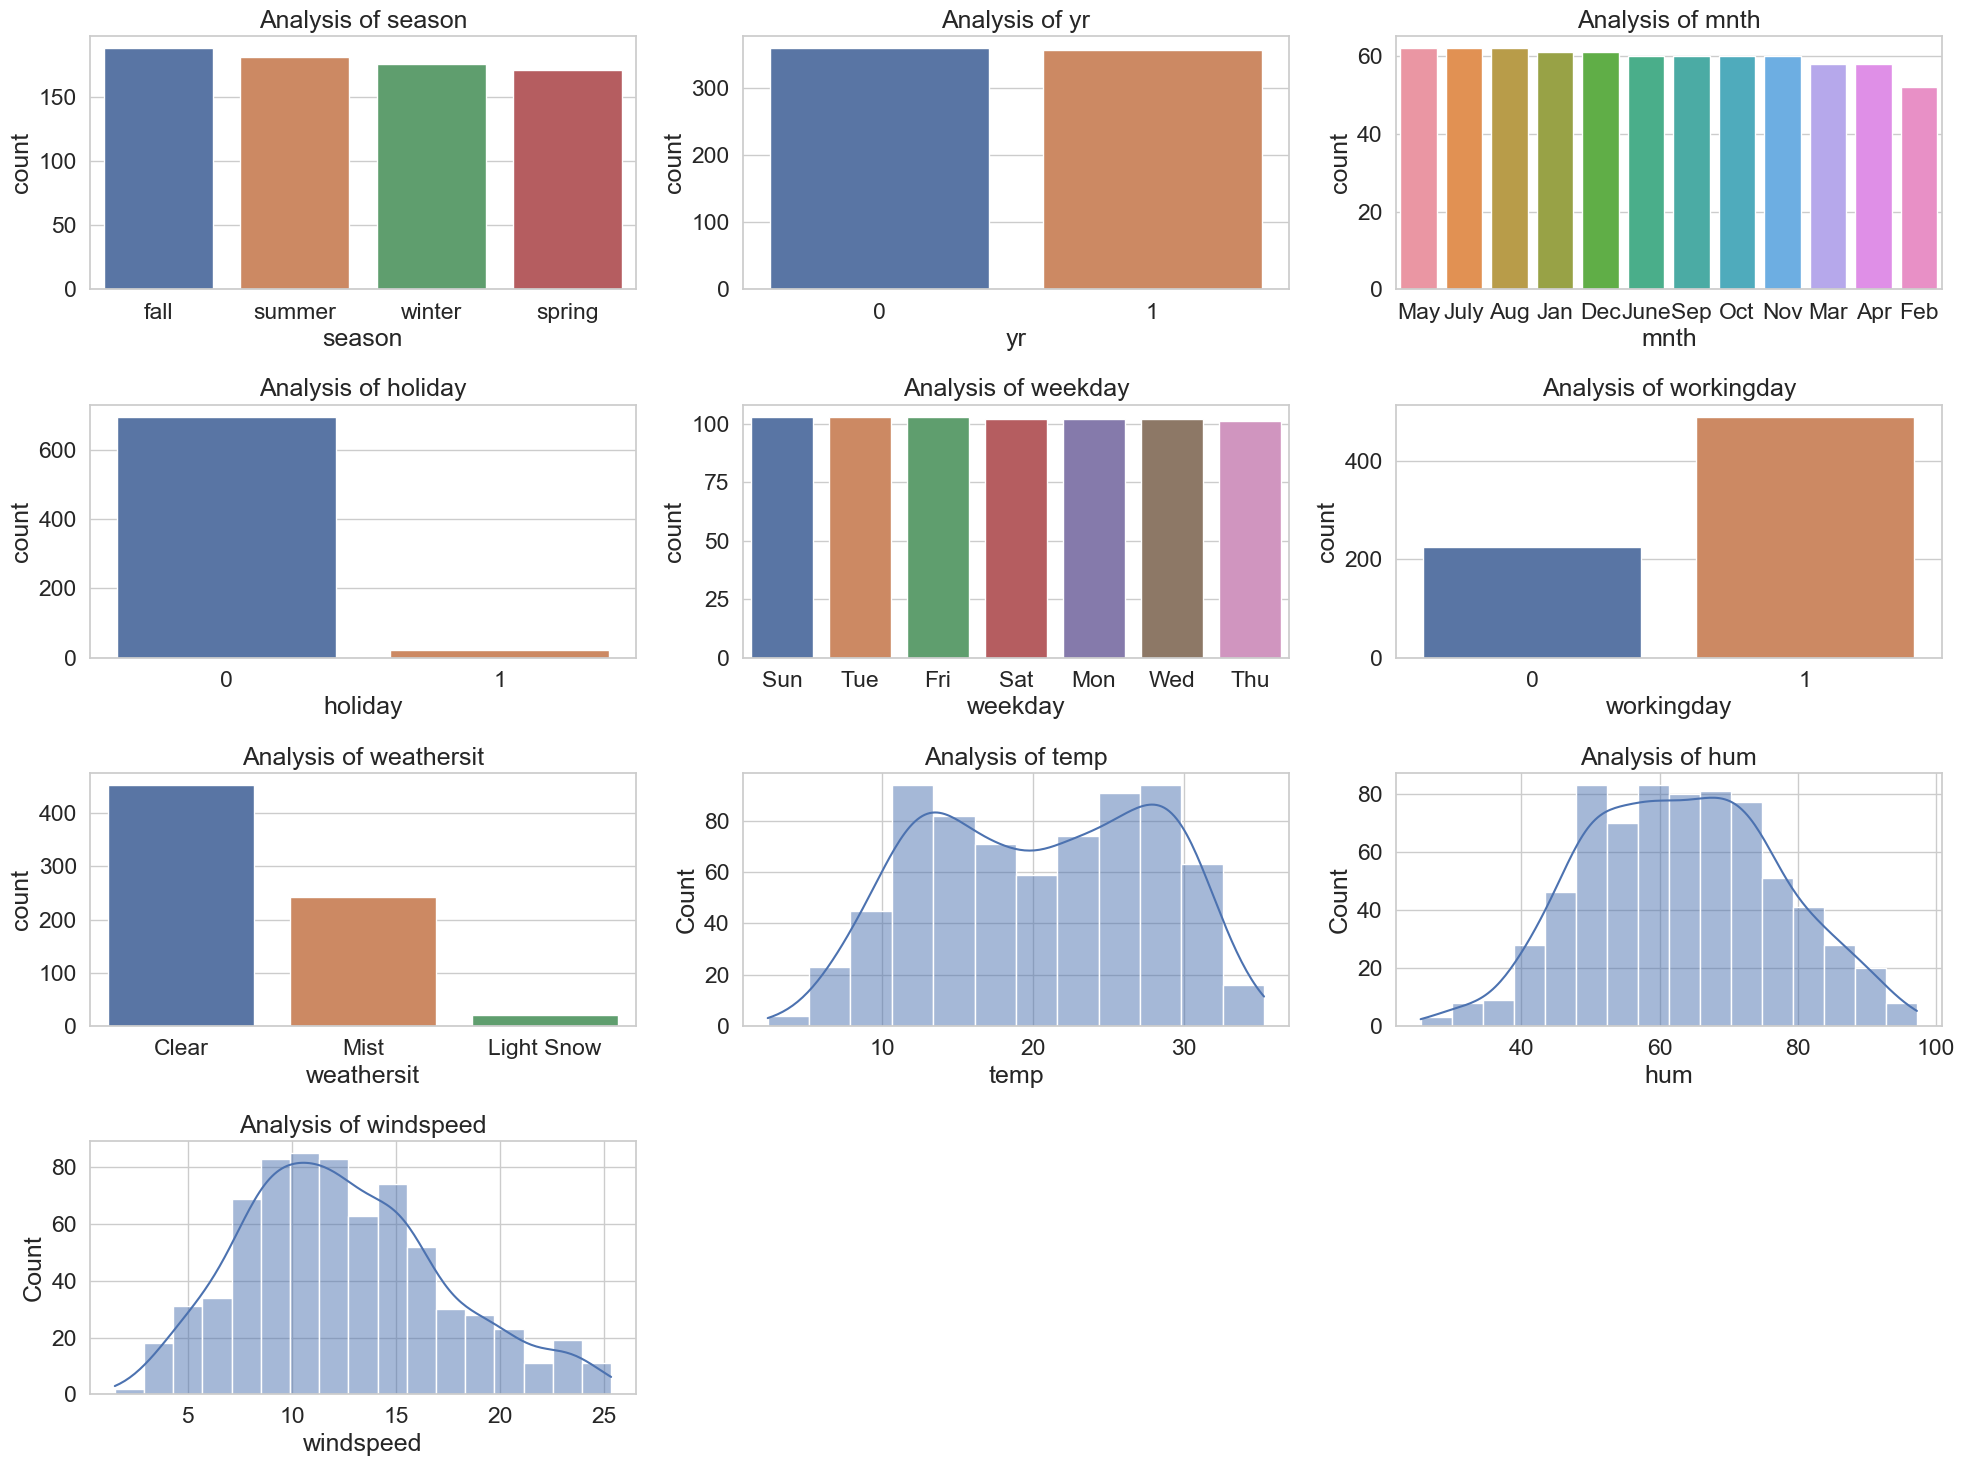

In [255]:
columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed']

# Set up the plotting area
plt.figure(figsize=(20, 15))

# Loop through each column and create a subplot
for i, column in enumerate(columns, 1):
    plt.subplot(4, 3, i)
    # Get value counts for categorical columns
    if bikeshare_df[column].dtype == 'object' or bikeshare_df[column].nunique() < 10:
        value_counts = bikeshare_df[column].value_counts()
        sns.barplot(x=value_counts.index, y=value_counts.values)
        plt.xlabel(column)
        plt.ylabel('count')
    else:
        sns.histplot(data=bikeshare_df, x=column, kde=True)
    plt.title(f'Analysis of {column}')

plt.tight_layout()
plt.show()

  **Observations:**

  1. From the "Season vs. Rentals per Day" plot, it's evident that fall has the highest average rentals, followed by summer.

  2. When looking at year-by-year rentals, 2019 shows a median increase of 2,000 rentals compared to 2018.

  3. The "Month-wise Rentals" plot reveals that September has the highest rentals, followed by the two surrounding months, which suggests a seasonal trend.

  4. On holidays, rental counts are generally lower compared to working days, with greater variability in demand on holidays.

  5. There is no significant difference in rentals based on weekdays, except that Thursdays and Sundays exhibit higher variations in rentals compared to other days.

## Correlation Analysis with Continuous Variables  

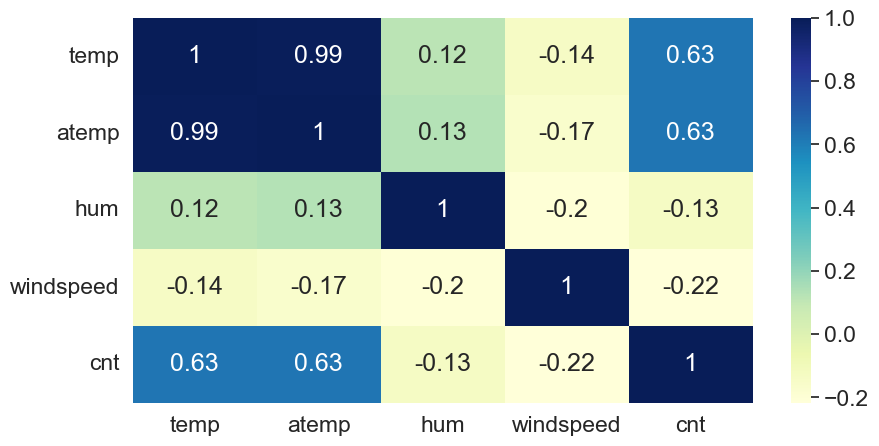

In [ ]:

num_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
plt.figure(figsize=(10,5))
sns.heatmap(bikeshare_df[num_cols].corr(),annot=True,cmap='YlGnBu')
plt.show()

In [ ]:
bikeshare_df[['temp','atemp','hum','windspeed','cnt']].corr()

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991732,0.115823,-0.140355,0.625421
atemp,0.991732,1.000000,0.128144,-0.166220,0.628802
hum,0.115823,0.128144,1.000000,-0.204546,-0.134521
windspeed,-0.140355,-0.166220,-0.204546,1.000000,-0.216685
cnt,0.625421,0.628802,-0.134521,-0.216685,1.000000


Observations: 

When examining the correlation between selected continuous variables and the count of bike rentals ('cnt'), the following observations were made:

  1. 'atemp' (adjusted temperature) exhibits the highest positive correlation with 'cnt,' indicating that as the adjusted temperature increases, the count of bike rentals tends to increase as well.

  2. 'temp' (temperature) also shows a positive correlation with 'cnt,' although slightly lower than 'atemp.'

  3. 'hum' (humidity) has the lowest correlation with 'cnt,' suggesting that changes in humidity have a weaker impact on bike rental counts.

  4. Notably, the correlation between 'temp' and 'atemp' is nearly 1, indicating a very strong positive linear relationship. As a result, considering their high correlation, it may be advisable to drop one of these variables to avoid multicollinearity in subsequent analyses.

Dropping 'atemp' as it is closely correlated to 'temp'

In [ ]:
# dropping atemp variable 
bikeshare_df = bikeshare_df.drop(columns=['atemp'])
bikeshare_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [ ]:
bikeshare_df.shape 

(716, 11)

### After droping atemp check Correlation with Continuous Variables

In [ ]:
bikeshare_df[['temp','hum','windspeed']].corr()

,temp,hum,windspeed
temp,1.000000,0.115823,-0.140355
hum,0.115823,1.000000,-0.204546
windspeed,-0.140355,-0.204546,1.000000


## Data Preprocessing (Creating Dummy Variables for Categorical Features)

  **Creating Dummy Variables:**

  To handle categorical variables like 'season', 'mnth', 'weekday', and 'weathersit', dummy variables are created. This is done to convert categorical data into a numerical format suitable for analysis.

  - 'season_indicators': Dummy variables are generated for the 'season' column with one-hot encoding, and the first category is dropped to avoid multicollinearity.
  
  - 'mnth_indicators': Similarly, dummy variables are created for the 'mnth' column.
  
  - 'weekday_indicators': Dummy variables are generated for the 'weekday' column.
  
  - 'weathersit_indicators': Dummy variables are created for the 'weathersit' column.

  **Updating DataFrame:**

  - The newly created indicator variable columns are added to the 'df_bikes' DataFrame.
  
  - The original categorical columns ('season', 'mnth', 'weekday', 'weathersit') are dropped since they are no longer needed.

In [ ]:
season_indicators = pd.get_dummies(bikeshare_df['season'],drop_first=True).astype(int)
mnth_indicators = pd.get_dummies(bikeshare_df['mnth'],drop_first=True).astype(int)
weekday_indicators = pd.get_dummies(bikeshare_df['weekday'],drop_first=True).astype(int)
weathersit_indicators = pd.get_dummies(bikeshare_df['weathersit'],drop_first=True).astype(int)

# adding indicator variable columns to the dataset . Dropping original columns
bikeshare_df = pd.concat([bikeshare_df,season_indicators,mnth_indicators,weekday_indicators,weathersit_indicators],axis=1)
bikeshare_df = bikeshare_df.drop(columns=['season','mnth','weekday','weathersit'])

bikeshare_df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
bikeshare_df.shape

(716, 29)

In [ ]:
bikeshare_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'July',
       'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu',
       'Tue', 'Wed', 'Light Snow', 'Mist'],
      dtype='object')

## Data Splitting (Train-Test Split)
  
  **Splitting the Dataset:**

- The dataset is split into two subsets: a training set and a test set. This division is essential for building and evaluating machine learning models.

In [ ]:
bikeshare_df_train,bikeshare_df_test=train_test_split(bikeshare_df,train_size=0.7,random_state=100)
print(bikeshare_df_train.shape)
print(bikeshare_df_test.shape)

(501, 29)
(215, 29)


## Data Preprocessing (Scaling Numerical Variables)

  **Scaling Procedure:**

  In this step, we perform Min-Max scaling on a subset of numerical variables, including 'temp,' 'hum,' and 'windspeed,' within the training data ('bikeshare_df_train').

In [ ]:
numerical_scaler = MinMaxScaler()
num_vars = ['temp','hum','windspeed']
numerical_scaler.fit(bikeshare_df_train[num_vars]) # type: ignore
bikeshare_df_train[num_vars] = numerical_scaler.fit_transform(bikeshare_df_train[num_vars])
bikeshare_df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist
728,1,0,0,0.252441,0.293114,0.923102,1796,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
541,1,0,1,0.733702,0.126342,0.914353,7442,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
116,0,0,1,0.719799,0.826912,0.814718,3872,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
718,1,0,1,0.347624,0.572964,0.309436,4128,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
496,1,0,0,0.648145,0.288693,0.283207,7429,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


## Checking Correlation in the Training Data
  
  **Observations:**
  
  In the correlation analysis of the training data, the following observations were made:
  
  - We can observe a strong positive correlation between the following variables and the count of rentals (`cnt`):
    - `temp`: The temperature appears to have a positive influence on bike rentals.
    - `year`: The year also shows a positive correlation with rental counts, indicating a potential year-to-year growth trend.

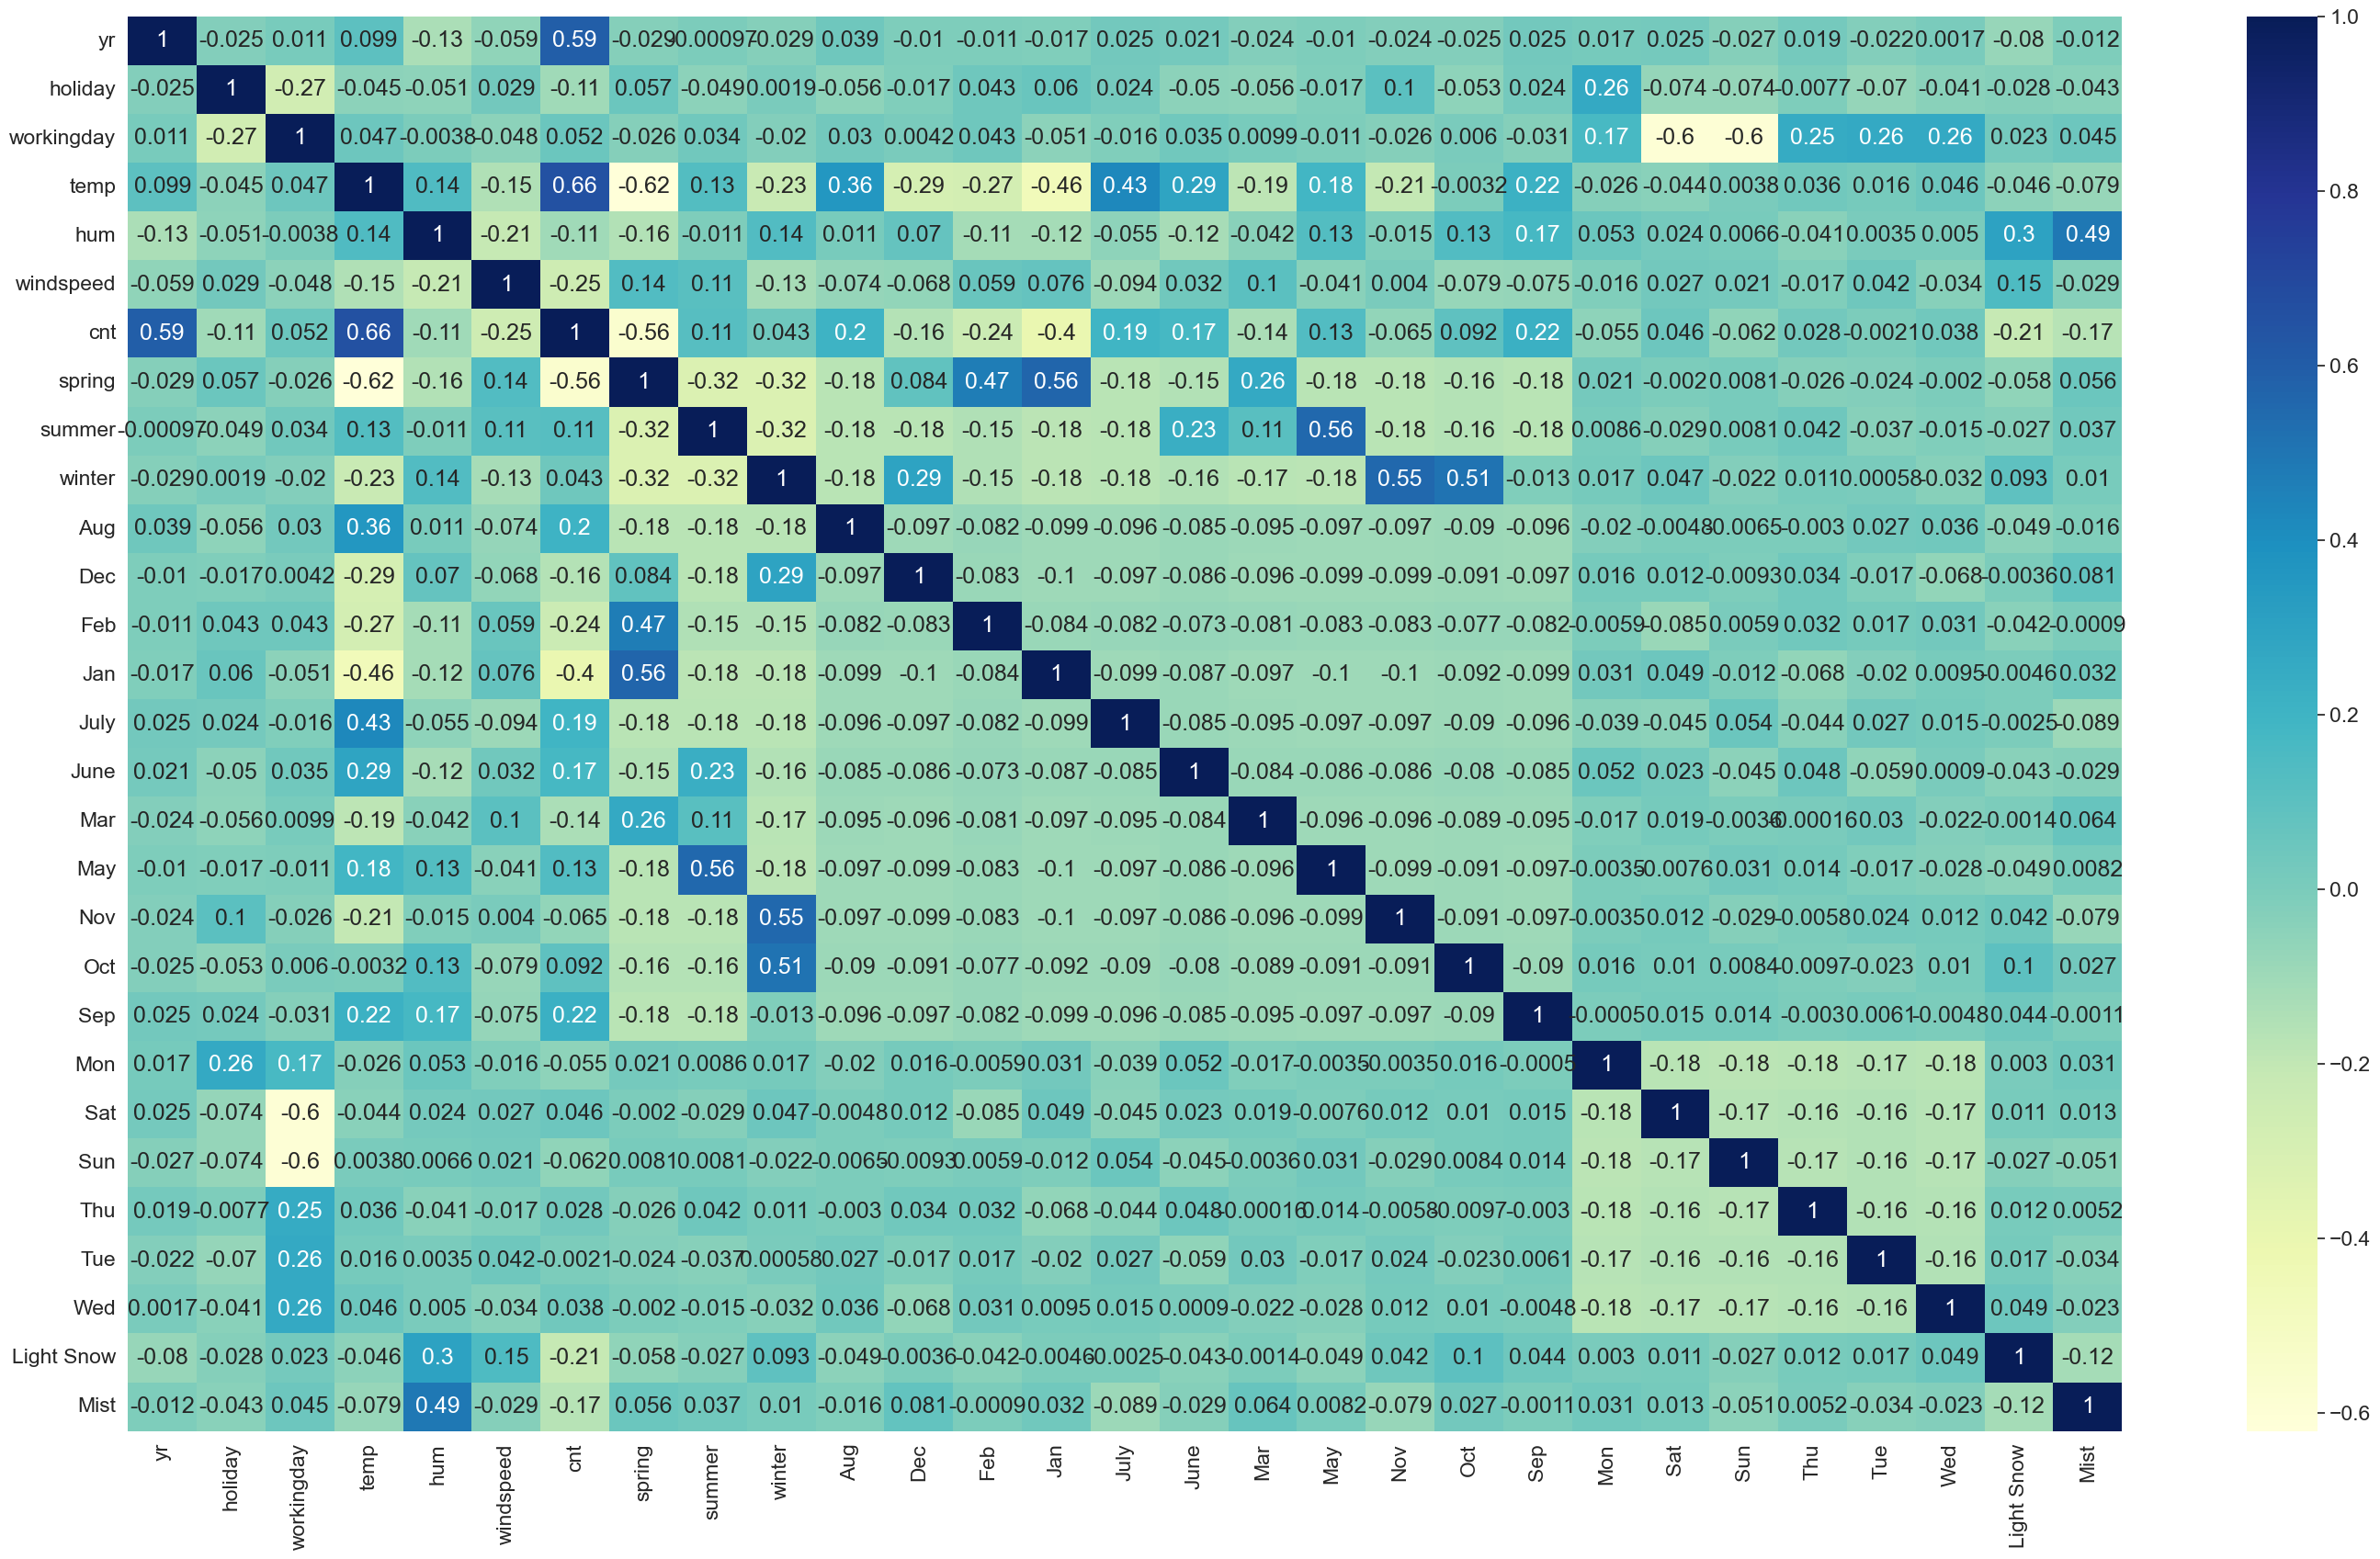

In [ ]:
plt.figure(figsize = (35, 20))
sns.heatmap(bikeshare_df_train.corr(), annot = True,cmap ='YlGnBu')
plt.show()

##### Dividing independent and dependent variables

In [ ]:
y_train = bikeshare_df_train.pop('cnt')
X_train = bikeshare_df_train
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist
728,1,0,0,0.252441,0.293114,0.923102,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
541,1,0,1,0.733702,0.126342,0.914353,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
116,0,0,1,0.719799,0.826912,0.814718,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
718,1,0,1,0.347624,0.572964,0.309436,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
496,1,0,0,0.648145,0.288693,0.283207,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
bikeshare_df_train.shape

(501, 28)

## Modelling Approach

  **Approach:**

  A mixed approach is employed for feature selection and model building.

  1. **Recursive Feature Elimination (RFE):**
  
     - The initial step involves selecting the 15 best columns using the Recursive Feature Elimination (RFE) method. RFE is a feature selection technique that recursively removes less important features based on their contribution to the model's performance.
  
  2. **P-Value Method:**
  
     - After the initial feature selection with RFE, further feature elimination is performed using the p-value method. This method assesses the statistical significance of each feature's contribution to the model and removes those with high p-values, indicating low significance.



In [ ]:
# Selecting 15 Features using RFE 
lm = LinearRegression()
rfe = RFE(lm,n_features_to_select=15, step=1)
selector = rfe.fit(X_train,y_train)

In [ ]:
# RFE Feature Ranking
rfe_ranking = pd.DataFrame({'rank' : selector.ranking_, 'support': selector.support_, 'features' : X_train.columns}).sort_values(by='rank',ascending=True)
rfe_ranking

,rank,support,features
0,1,True,yr
19,1,True,Sep
17,1,True,Nov
16,1,True,May
26,1,True,Light Snow
12,1,True,Jan
11,1,True,Feb
10,1,True,Dec
27,1,True,Mist
6,1,True,spring


In [ ]:
# Selected Features
selected_features = rfe_ranking.loc[rfe_ranking['rank'] == 1,'features'].values
selected_features

array(['yr', 'Sep', 'Nov', 'May', 'Light Snow', 'Jan', 'Feb', 'Dec',
       'Mist', 'spring', 'windspeed', 'hum', 'holiday', 'winter', 'temp'],
      dtype=object)

### Building model using statsmodel, for the detailed statistics

#### Manual Elimination using High P-Value and Low VIF

In [ ]:
# Function for Ordinary Least Squares (OLS) Regression Fit
def ols_fit(y, X):
    
    # Add a constant term to the independent variables
    X_train_sm = sm.add_constant(X)
    
    # Fit an OLS regression model
    model = sm.OLS(y, X_train_sm).fit()
    
    # Print the summary statistics of the regression
    print(model.summary())
    
    return model

# Function for Variance Inflation Factor (VIF) Calculation
def vif(X):
    
    # Add a constant term to the independent variables
    df = sm.add_constant(X)
    
    # Calculate the VIF for each independent variable
    vif = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    
    # Create a DataFrame to display VIF values
    vif_frame = pd.DataFrame({'vif': vif[0:]}, index=df.columns).reset_index()
    
    # Print the DataFrame, sorted by VIF values in descending order
    print(vif_frame.sort_values(by='vif', ascending=False))

## Model 1:
* Using features selected by RFE

In [ ]:
features_1 = selected_features
ols_fit(y_train,X_train[features_1])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     186.6
Date:                Tue, 06 Aug 2024   Prob (F-statistic):          2.51e-190
Time:                        00:14:29   Log-Likelihood:                -4030.9
No. Observations:                 501   AIC:                             8094.
Df Residuals:                     485   BIC:                             8161.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2980.6516    238.422     12.502      0.0

## Model 2 :
Dropping Feb because of its p-value of 0.036

In [ ]:
del_feature = 'Feb'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     198.2
Date:                Tue, 06 Aug 2024   Prob (F-statistic):          1.56e-190
Time:                        00:14:29   Log-Likelihood:                -4033.2
No. Observations:                 501   AIC:                             8096.
Df Residuals:                     486   BIC:                             8160.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2897.6884    235.955     12.281      0.0

## Model 3 :
Dropping Mat because of its p-value of 0.076

In [ ]:
del_feature = 'May'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     210.0
Date:                Tue, 06 Aug 2024   Prob (F-statistic):          4.39e-190
Time:                        00:14:29   Log-Likelihood:                -4037.0
No. Observations:                 501   AIC:                             8102.
Df Residuals:                     487   BIC:                             8161.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2960.8851    236.405     12.525      0.0

## Verifying MultiCollinearity

In [ ]:
vif(X_train[selected_features])

         index        vif
0        const  46.585774
13        temp   3.050428
8       spring   2.845655
12      winter   2.321936
10         hum   1.994472
3          Nov   1.790366
5          Jan   1.644260
7         Mist   1.612655
6          Dec   1.458016
4   Light Snow   1.357015
9    windspeed   1.179037
2          Sep   1.102349
1           yr   1.054783
11     holiday   1.027500


  **Observation:**
  
  When assessing multicollinearity among the selected features, the following observations were made:

  1. The Variance Inflation Factor (VIF) for all selected features is less than 5. This indicates that there is no significant multicollinearity among these features. VIF values below 5 generally suggest that the predictor variables are not highly correlated with each other.

  2. Additionally, the comparison of R-squared and adjusted R-squared values also supports the absence of significant multicollinearity. When these two values are similar, it suggests that the inclusion of multiple predictor variables is not leading to overfitting or redundancy in the regression model.

In [ ]:
final_model = ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     210.0
Date:                Tue, 06 Aug 2024   Prob (F-statistic):          4.39e-190
Time:                        00:14:30   Log-Likelihood:                -4037.0
No. Observations:                 501   AIC:                             8102.
Df Residuals:                     487   BIC:                             8161.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2960.8851    236.405     12.525      0.0

## <b>Model Summary</b>

1. The R-squared value of the model is approximately 85%, indicating that 85% of the variance in the count quantity is explained by all the variables. The adjusted R-squared is 84.5%.

2. All the p-values of the features are less than 0.05, indicating that they are statistically significant in explaining the variation in the dependent variable.

3. The low Prob(F-statistic) suggests that the overall model is a good fit for the data.

4. The Variance Inflation Factor (VIF) for all the variables is generally less than 5, meeting the condition for multicollinearity.

### Residual Analysis
#### Observations:
- We can observed that the error terms follow a normal distribution.

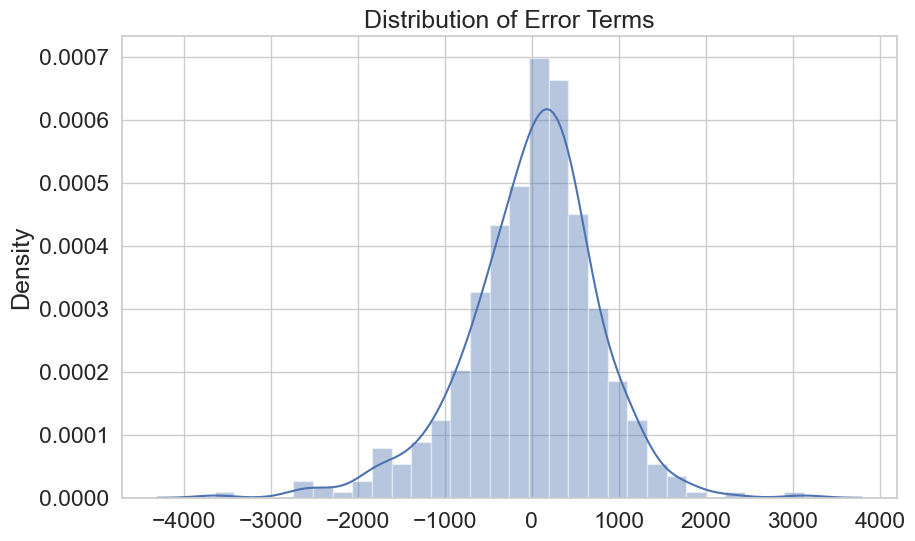

In [ ]:
# Residual Analysis of Trained Data
X_train_sm = sm.add_constant(X_train[selected_features])

y_train_pred = final_model.predict(X_train_sm)
fig, ax = plt.subplots(figsize=(10, 6))

# Frequency Distribution of Residuals
ax.set(title='Distribution of Error Terms')
sns.distplot(y_train - y_train_pred, bins=30, ax=ax)

plt.show()

### Test Homoscedasticity
### Observations:
* We can observe that there is a constant deviation from the zero line, and there are no visible patterns in the error terms. So, this model fit looks good.

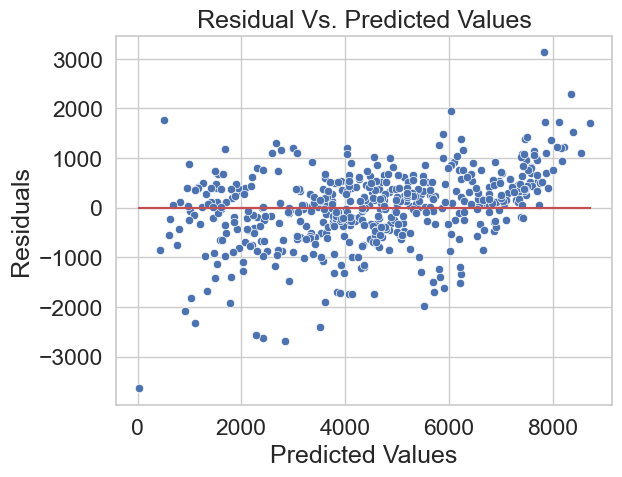

In [ ]:
sns.scatterplot(x=y_train, y=y_train - y_train_pred)
plt.plot(y_train, [0] * len(y_train), '-r')
plt.title('Residual Vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

### Error term Trend verification
### Observations:
* Lagplot of residuals shows no trend. Hence the error terms have constant variance.

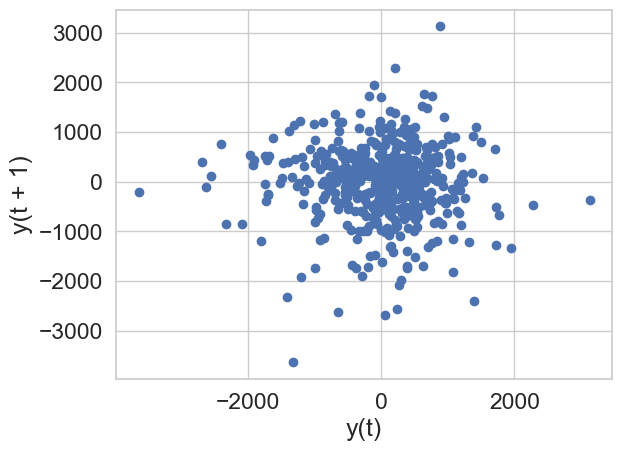

In [ ]:
# lag plot to assess independence of data points
lag_plot(y_train-y_train_pred)
plt.show()

**Based on all of this analysis, we can confidently conclude that the assumptions of Linear Regression are met by this model.**


# Making Prediction

In [ ]:
y_test = bikeshare_df_test.pop('cnt')
X_test = bikeshare_df_test
X_test[num_vars] = numerical_scaler.transform(X_test[num_vars])
X_test = X_test[selected_features]

In [ ]:
X_test = sm.add_constant(X_test)
y_test_pred = final_model.predict(X_test)

# Model Evaluation


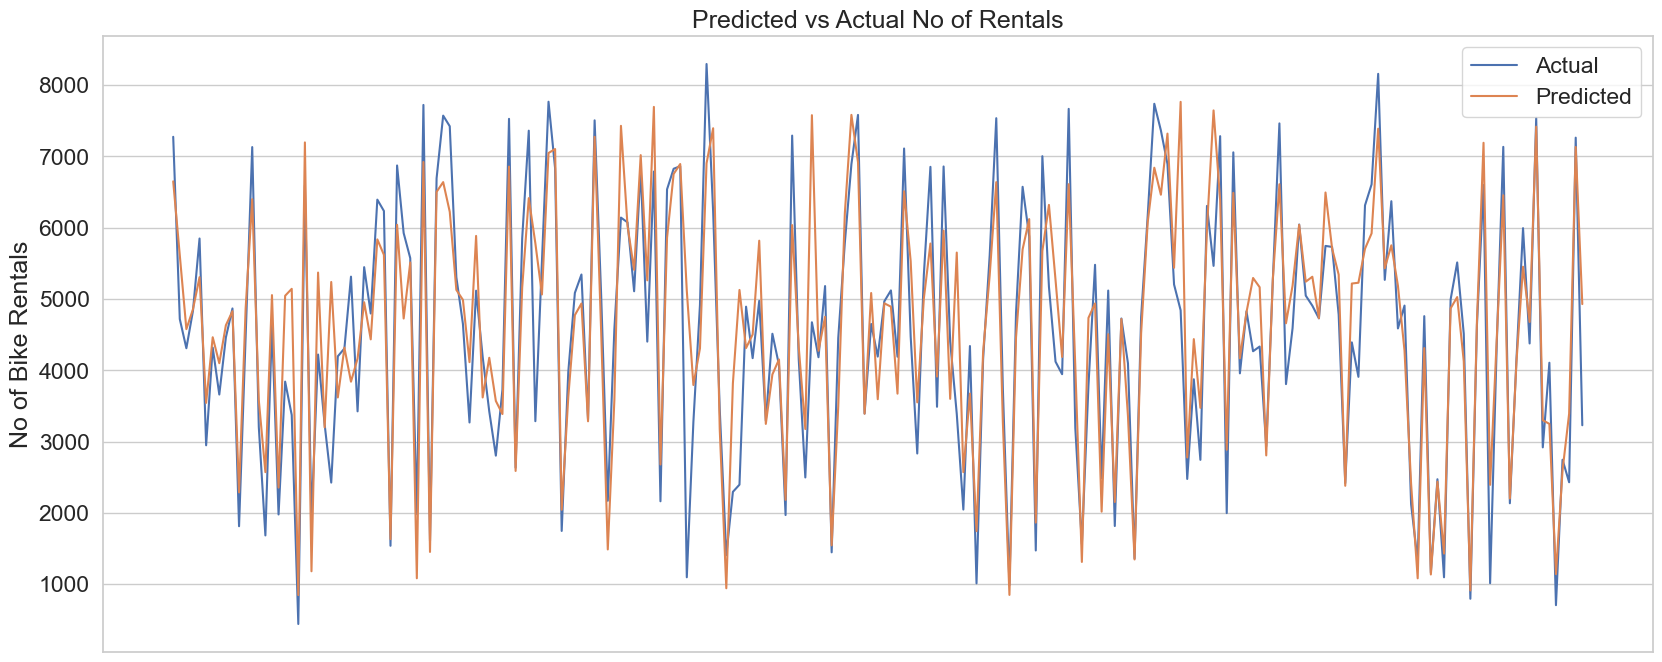

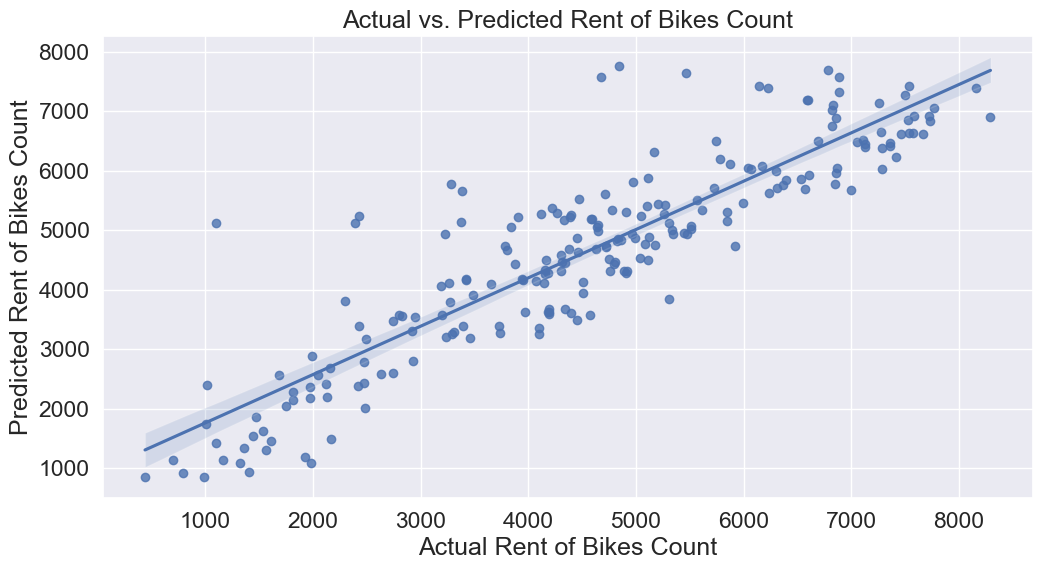

In [ ]:
# Plotting Actual vs Predicted No of rentals 
fig,ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(20)
l1,=ax.plot(range(len(y_test)),y_test)
l2, = ax.plot(range(len(y_test_pred)),y_test_pred)
plt.legend([l1,l2],['Actual','Predicted'])
plt.title('Predicted vs Actual No of Rentals');
plt.ylabel('No of Bike Rentals')
plt.xticks([])
plt.show()


# Plotting y_test and y_pred to understand the spread.
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.regplot(x=y_test, y=y_test_pred)
plt.title('Actual vs. Predicted Rent of Bikes Count')
plt.xlabel('Actual Rent of Bikes Count')
plt.ylabel('Predicted Rent of Bikes Count')
plt.show()

### Observations
- Predicted vs observed value plots shows that the model is reasonably accurate.

## Check R-square on test data


In [ ]:
mse = mean_squared_error(y_test, y_test_pred)
rsquared_test = r2_score(y_test, y_test_pred)
rsquared_train = r2_score(y_train, y_train_pred)
print('R-squared for train data:',round(rsquared_train,2))
print('R-squared for test data:',round(rsquared_test,2))
print('Mean Squared Error',round(mse,3))

R-squared for train data: 0.85
R-squared for test data: 0.79
Mean Squared Error 706472.743


# Model Stability

In [ ]:
# R-square using cross validation
lr = LinearRegression()
clr = cross_val_score(lr,X_train[selected_features],y_train,cv=10, scoring='r2')
clr

array([0.79077617, 0.86261594, 0.84429685, 0.85147512, 0.84247455,
       0.78200073, 0.85775532, 0.68553193, 0.88783004, 0.90871313])

In [ ]:
print("R-square at 0.95 confidence level : %0.2f (+/- %0.2f)" % (clr.mean(), clr.std() * 2))

R-square at 0.95 confidence level : 0.83 (+/- 0.12)


In [ ]:
selected_features

array(['yr', 'Sep', 'Nov', 'Light Snow', 'Jan', 'Dec', 'Mist', 'spring',
       'windspeed', 'hum', 'holiday', 'winter', 'temp'], dtype=object)

# Top Features

In [ ]:
Cofficients = round(final_model.params,2)
beta = Cofficients.sort_values(ascending = False)
beta

temp          3397.92
const         2960.89
yr            2008.02
winter         742.44
Sep            592.76
Mist          -377.89
Jan           -505.60
Dec           -508.64
Nov           -656.00
holiday       -702.06
spring        -913.41
hum           -998.12
windspeed    -1006.50
Light Snow   -1864.35
dtype: float64

In [ ]:
for i in range(0, len(beta)):
    print(beta[i], '*', beta.index[i], end=' + ')


3397.92 * temp + 2960.89 * const + 2008.02 * yr + 742.44 * winter + 592.76 * Sep + -377.89 * Mist + -505.6 * Jan + -508.64 * Dec + -656.0 * Nov + -702.06 * holiday + -913.41 * spring + -998.12 * hum + -1006.5 * windspeed + -1864.35 * Light Snow + 

## Conclusion

## Best Fit Line

3397.92 * temp + 2960.89 * const + 2008.02 * yr + 742.44 * winter + 592.76 * Sep + -377.89 * Mist + -505.6 * Jan + -508.64 * Dec + -656.0 * Nov + -702.06 * holiday + -913.41 * spring + -998.12 * hum + -1006.5 * windspeed + -1864.35 * Light Snow 

## Final Assessment

1. **Temperature (temp)**: Temperature has the most significant positive impact on bike rental demand. As the temperature rises, the demand for bike rentals increases significantly.

2. **Year (yr)**: The year has a positive impact on demand. Over time, there has been an increasing trend in bike rentals.

3. **Winter Season (winter)**: The winter season is associated with increased demand, possibly due to recreational winter activities and holidays.

4. **September (Sep)**: The month of September has a positive influence on demand, indicating higher rentals during this month.

5. **Mist (Mist)**: Misty weather conditions have a negative impact on demand, with fewer rentals during misty days.

6. **January (Jan)**: December has a negative impact on demand, possibly due to colder weather and holidays.

7. **December (Dec)**: December has a negative impact on demand, possibly due to colder weather and holidays.

8. **November (Nov)**: November also shows a negative influence on demand, likely because of decreasing temperatures.

9. **Holiday**: Holiday has a negative impact on demand.  

10. **Spring, humidity, windspeed and light snow**: Holiday has a negative impact on demand. Strong winds are associated with lower bike rental activity.








